In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# B73

In [2]:
train_clinical = pd.read_csv("train_clinical_B73_merged.csv")
test_clinical = pd.read_csv("test_clinical_B73_merged.csv")

In [3]:
train_X= pd.read_csv("CP breast 73 train rank9.csv",header=None)
test_X = pd.read_csv("CP breast 73 test rank9.csv",header=None)

In [4]:
train_Y = train_clinical["Tumor_purity"]
train_Y_clean = train_Y.apply(lambda x:1 if x >= 0.7 else 0)

y_test = test_clinical["Tumor_purity"]
y_test = y_test.apply(lambda x:1 if x >= 0.7 else 0)

# logistic 

In [5]:
LR = LogisticRegression(random_state = 160)
LR.fit(train_X,train_Y_clean)

LR_y_pred=LR.predict(test_X)
print(classification_report(y_test,LR_y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.59      1.00      0.75       110

    accuracy                           0.59       185
   macro avg       0.30      0.50      0.37       185
weighted avg       0.35      0.59      0.44       185



# KNN

In [6]:
KNN = KNeighborsClassifier()
KNN.fit(train_X,train_Y_clean)

KNN_y_pred=KNN.predict(test_X)
print(classification_report(y_test,KNN_y_pred))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        75
           1       0.00      0.00      0.00       110

    accuracy                           0.41       185
   macro avg       0.20      0.50      0.29       185
weighted avg       0.16      0.41      0.23       185



# NB

In [7]:
NB = GaussianNB()
NB.fit(train_X,train_Y_clean)

NB_y_pred=NB.predict(test_X)
print(classification_report(y_test,NB_y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.59      1.00      0.75       110

    accuracy                           0.59       185
   macro avg       0.30      0.50      0.37       185
weighted avg       0.35      0.59      0.44       185



# Decision Tree

In [8]:
DT = DecisionTreeClassifier(random_state = 100)
DT.fit(train_X,train_Y_clean)

DT_y_pred=DT.predict(test_X)
print(classification_report(y_test,DT_y_pred))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        75
           1       0.00      0.00      0.00       110

    accuracy                           0.41       185
   macro avg       0.20      0.50      0.29       185
weighted avg       0.16      0.41      0.23       185



In [9]:
Counter(DT_y_pred.flatten())

Counter({0: 185})

# SVM

In [10]:
SVC = SVC(random_state = 100)
SVC.fit(train_X,train_Y_clean)

SVC_y_pred=SVC.predict(test_X)
print(classification_report(y_test,SVC_y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.59      1.00      0.75       110

    accuracy                           0.59       185
   macro avg       0.30      0.50      0.37       185
weighted avg       0.35      0.59      0.44       185



In [11]:
Counter(SVC_y_pred.flatten())

Counter({1: 185})

# GradientBoostingClassifer

max_socre：0.7703488372093024 n_estimators：11


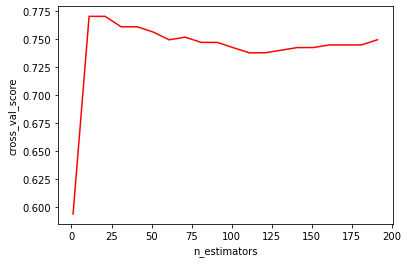

In [12]:
score_lt = []
for i in range(0,200,10):
    gb = GradientBoostingClassifier(n_estimators=i+1
                                ,random_state=100)
    score = cross_val_score(gb, train_X, train_Y_clean, cv=10).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('max_socre：{}'.format(score_max),
      'n_estimators：{}'.format(score_lt.index(score_max)*10+1))

x = np.arange(1,201,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.xlabel("n_estimators")
plt.ylabel("cross_val_score")
plt.show()

In [13]:
GB = GradientBoostingClassifier(n_estimators = 11,random_state = 100)
GB.fit(train_X,train_Y_clean)

GB_y_pred=GB.predict(test_X)
print(classification_report(y_test,GB_y_pred))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        75
           1       0.00      0.00      0.00       110

    accuracy                           0.41       185
   macro avg       0.20      0.50      0.29       185
weighted avg       0.16      0.41      0.23       185



In [14]:
Counter(GB_y_pred.flatten())

Counter({0: 185})

# Adaboost

max_socre：0.7866807610993657 n_estimators：1


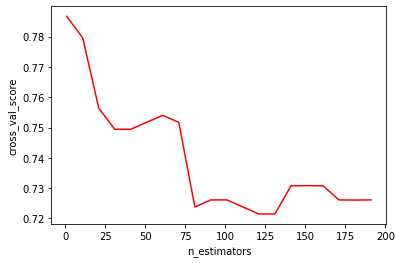

In [15]:
score_lt = []
for i in range(0,200,10):
    adb = AdaBoostClassifier(n_estimators=i+1
                                ,random_state=100)
    score = cross_val_score(adb, train_X, train_Y_clean, cv=10).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('max_socre：{}'.format(score_max),
      'n_estimators：{}'.format(score_lt.index(score_max)*10+1))

x = np.arange(1,201,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.xlabel("n_estimators")
plt.ylabel("cross_val_score")
plt.show()

In [16]:
AB = AdaBoostClassifier(n_estimators = 1, random_state = 100)
AB.fit(train_X,train_Y_clean)

AB_y_pred=AB.predict(test_X)
print(classification_report(y_test,AB_y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.59      1.00      0.75       110

    accuracy                           0.59       185
   macro avg       0.30      0.50      0.37       185
weighted avg       0.35      0.59      0.44       185



In [17]:
Counter(AB_y_pred.flatten())

Counter({1: 185})

# Random forest

In [18]:
RF= RandomForestClassifier(random_state = 100)
RF.fit(train_X,train_Y_clean)

RF_y_pred=RF.predict(test_X)
print(classification_report(y_test,RF_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.27      0.40        75
           1       0.66      0.96      0.78       110

    accuracy                           0.68       185
   macro avg       0.75      0.62      0.59       185
weighted avg       0.73      0.68      0.63       185



In [19]:
Counter(RF_y_pred.flatten())

Counter({1: 161, 0: 24})

# RF tuning

max_socre：0.7773784355179704 n_estimators：131


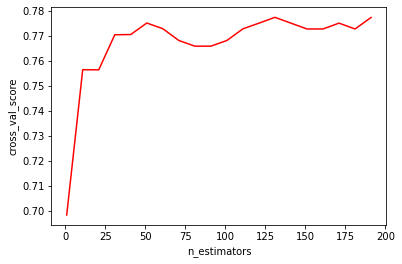

In [20]:
score_lt = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, train_X, train_Y_clean, cv=10).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('max_socre：{}'.format(score_max),
      'n_estimators：{}'.format(score_lt.index(score_max)*10+1))

x = np.arange(1,201,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.xlabel("n_estimators")
plt.ylabel("cross_val_score")
plt.show()

max_socre：0.7796511627906977 n_estimators：132


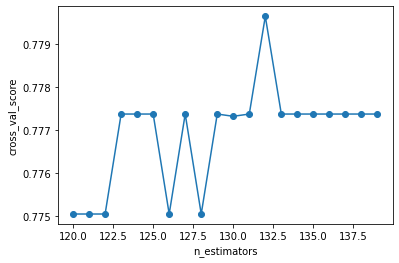

In [21]:
score_lt = []
for i in range(120,140):
    rfc = RandomForestClassifier(n_estimators=i
                                ,random_state=90)
    score = cross_val_score(rfc, train_X, train_Y_clean, cv=10).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('max_socre：{}'.format(score_max),
      'n_estimators：{}'.format(score_lt.index(score_max)+120))

x = np.arange(120,140)
plt.subplot(111)
plt.plot(x, score_lt,'o-')
plt.xlabel("n_estimators")
plt.ylabel("cross_val_score")
plt.show()

In [22]:
rfc = RandomForestClassifier(n_estimators=133, random_state=90)

param_grid = {'max_depth':np.arange(1,50)}
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(train_X, train_Y_clean)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

{'max_depth': 2} 0.7890063424947146


In [23]:
param_grid = {'max_features':np.arange(3,10)}

rfc = RandomForestClassifier(n_estimators=133
                            ,random_state=100
                            ,max_depth=2)
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(train_X, train_Y_clean)
best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score) 

{'max_features': 9} 0.7959302325581395
